In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


TESTING COMBINED CNN AND GIST FEATURES

In [ ]:
# COMBINING TRAINING 1 AND 2, FILL IN MISSING DATA

files = ['/content/drive/MyDrive/fml coursework/assignment data/training1.csv', 
         '/content/drive/MyDrive/fml coursework/assignment data/training2.csv']

df2 = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df2 = pd.concat([df2, data], axis=0)
df2.to_csv('merged_files.csv', index=False)

concatenated_data=pd.read_csv('merged_files.csv')

labels = concatenated_data['label']
confidence = concatenated_data['confidence']

CNN = concatenated_data.iloc[:, :2048].copy()
GIST = concatenated_data.iloc[:, 2048:2304].copy()

# calculate mean of CNN and GIST separately
CNN_mean = CNN.mean()
GIST_mean = GIST.mean()

CNN.loc[:, :] = CNN.fillna(CNN_mean)
GIST.loc[:, :] = GIST.fillna(GIST_mean)

filled_data = pd.concat([CNN, GIST, labels, confidence], axis=1)

# save the filled data to a new CSV file
filled_data.to_csv('filled_data.csv', index=False)

In [ ]:
#RANDOMISE ORDER OF FEATURES



import pandas as pd
import numpy as np

# read in the data from the files
files = ['/content/drive/MyDrive/fml coursework/assignment data/training1.csv', 
         '/content/drive/MyDrive/fml coursework/assignment data/training2.csv']

df2 = pd.DataFrame()
for file in files:
    data = pd.read_csv(file)
    df2 = pd.concat([df2, data], axis=0)

# shuffle the data randomly
df2_shuffled = df2.sample(frac=1, random_state=42)

# extract the relevant columns
labels = df2_shuffled['label']
confidence = df2_shuffled['confidence']
CNN = df2_shuffled.iloc[:, :2048].copy()
GIST = df2_shuffled.iloc[:, 2048:2304].copy()

# calculate mean of CNN and GIST separately
CNN_mean = CNN.mean()
GIST_mean = GIST.mean()

CNN.loc[:, :] = CNN.fillna(CNN_mean)
GIST.loc[:, :] = GIST.fillna(GIST_mean)

# concatenate the filled data and save to a new CSV file
filled_data2 = pd.concat([CNN, GIST, labels, confidence], axis=1)
filled_data2.to_csv('filled_data2.csv', index=False)

In [ ]:
#NORMALISE TEST DATA

test_data = pd.read_csv('/content/drive/MyDrive/fml coursework/assignment data/test.csv')

CNN = test_data.iloc[:, :2048].copy()
GIST = test_data.iloc[:, 2048:2304].copy()

# calculate mean of CNN and GIST separately
CNN_mean = CNN.mean()
GIST_mean = GIST.mean()

CNN.loc[:, :] = CNN.fillna(CNN_mean)
GIST.loc[:, :] = GIST.fillna(GIST_mean)

# concatenate the filled data and save to a new CSV file
test_data_filled = pd.concat([CNN, GIST], axis=1)

test_data_filled.to_csv('test_data_filled.csv', index=False)

In [ ]:
#LOGREG COMBINED




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

#filled_data2 = filled_data.drop(['confidence'], axis=1)

# Separate the features and labels
X = filled_data2.iloc[:, :-1]
y = filled_data2.iloc[:, -1]

# assume 'X' is the feature matrix and 'y' is the target vector
# split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for tuning C
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best value of C
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_C = grid_search.best_params_['C']

# Fit the logistic regression model to the training data with the best value of C
logreg = LogisticRegression(C=best_C)
logreg.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test_pca)

# Calculate the accuracy score of the model
comb_logreg_accuracy = accuracy_score(y_test, y_pred)

# Print the best value of C and the accuracy score
print("Best value of C:", best_C)
print("Accuracy:", comb_logreg_accuracy)

Best value of C: 0.0001
Accuracy: 0.7546666666666667


In [ ]:
#SVM COMBINED





import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

X = filled_data2.iloc[:, :-1]
y = filled_data2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Use the best hyperparameters to create a new SVM object
best_svm = SVC(C=0.01, kernel='linear', tol=0.0001)
best_svm.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test_pca)

# Evaluate the accuracy
comb_svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", comb_svm_accuracy)

Accuracy:  0.7546666666666667


In [ ]:
#combined RND FOREST





import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

X = filled_data2.iloc[:, :-1]
y = filled_data2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=150, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for tuning n_estimators
#param_grid = {'n_estimators': [100, 150, 200, 250], 'max_depth': [15, 20, 25, 30]}

# Use GridSearchCV to find the best value of n_estimators for Random Forest
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(rf, param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#best_n_estimators = grid_search.best_params_['n_estimators']
#best_max_depth = grid_search.best_params_['max_depth']

# Fit the Random Forest model to the first 500 rows training data with the best value of n_estimators
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=25)

# Fit the classifier to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_scaled)

# Calculate the accuracy score of the classifier
comb_rnd_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", comb_rnd_accuracy)

#print("Best n_estimators", best_n_estimators)

#print("best max_depth", best_max_depth)

Accuracy score: 0.768


In [ ]:
#RND FOREST WITH CONFIDENCE TEST




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv')

X = filled_data2.drop(['confidence', 'label'], axis=1)
y = filled_data2['label']
confidences = filled_data2['confidence']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, conf_train, conf_test = train_test_split(X, y, confidences, test_size=0.25, random_state=42)

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the parameter grid for tuning n_estimators
#param_grid = {'n_estimators': [100, 150, 200, 250], 'max_depth': [15, 20, 25, 30]}

# Use GridSearchCV to find the best value of n_estimators for Random Forest
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(rf, param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train, sample_weight=conf_train)
#best_n_estimators = grid_search.best_params_['n_estimators']
#best_max_depth = grid_search.best_params_['max_depth']

# Fit the Random Forest model to the training data with the best value of n_estimators
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=25)
rf.fit(X_train_scaled, y_train, sample_weight=conf_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_scaled)

# Calculate the accuracy score of the classifier
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", accuracy)

#print("Best n_estimators:", best_n_estimators)
#print("Best max_depth:", best_max_depth)


Accuracy score: 0.7546666666666667


In [ ]:
#COMBINED MLP




from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

X = filled_data2.iloc[:, :-1]
y = filled_data2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=150, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)


# Define the parameter grid for grid search
# param_grid = {
#     'hidden_layer_sizes': [(50,), (100,), (50, 50)],
#     'activation': ['relu', 'tanh'],
#     'solver': ['adam', 'sgd'],
#     'learning_rate': ['constant', 'adaptive']
# }

# Create an MLP classifier
# mlp = MLPClassifier(random_state=42)

# Perform grid search to find the best parameters
# grid_search = GridSearchCV(mlp, param_grid, cv=4, scoring='accuracy', n_jobs=-1)
# grid_search.fit(X_train_pca, y_train)

# Get the best parameters and best score
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# Create an MLP classifier with the best parameters
mlp_best = MLPClassifier(random_state=42, alpha=0.0001, activation='tanh', solver='sgd', learning_rate='adaptive', hidden_layer_sizes=(100, ))

# Fit the classifier on the training data
mlp_best.fit(X_train_pca, y_train)

# Predict on the testing data
y_pred = mlp_best.predict(X_test_pca)

# Evaluate the classifier
comb_mlp_accuracy = accuracy_score(y_test, y_pred)

print("Accuracy score:", comb_mlp_accuracy)

# print('best params', best_params)

Accuracy score: 0.7346666666666667


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
#combined NB


from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

X = filled_data2.iloc[:, :-1]
y = filled_data2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=150, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'var_smoothing': [1e-9, 1e-8, 1e-7]
}

# Create an instance of the Naive Bayes classifier
naive_bayes = GaussianNB()

# Perform grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(naive_bayes, param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Retrieve the best hyperparameters
best_params = grid_search.best_params_

# Create a new instance of the Naive Bayes classifier with the best parameters
naive_bayes_best = GaussianNB(var_smoothing=best_params['var_smoothing'])

# Fit the classifier on the training data
naive_bayes_best.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = naive_bayes_best.predict(X_test_scaled)

# Evaluate the performance of the classifier
comb_nb_accuracy = accuracy_score(y_test, y_pred)

print('Best accuracy', comb_nb_accuracy)

print('best params', best_params)

Best accuracy 0.736
best params {'var_smoothing': 1e-09}


TESTING CNN FEATURES ALONE


In [ ]:
# CNN MLP


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

CNN_data = filled_data2.drop(filled_data2.iloc[:, 2048:2304], axis=1)

X = CNN_data.iloc[:, :-1]
y = CNN_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Train an MLP classifier
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=500, alpha=0.0001, solver='sgd', verbose=10, random_state=42, tol=0.0001, activation='relu', learning_rate='constant')
#mlp.fit(X_train_pca, y_train)


mlp = MLPClassifier(hidden_layer_sizes=(150,), max_iter=500, random_state=42, solver='sgd', activation='relu', alpha=0.001)
mlp.fit(X_train_scaled, y_train)

y_pred = mlp.predict(X_test_scaled)

cnn_mlp_accuracy = accuracy_score(y_test, y_pred)

print(f'Testing Accuracy: {cnn_mlp_accuracy}')

Testing Accuracy: 0.7026666666666667


In [ ]:
#CNN LOGREG







import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

CNN_data = filled_data2.drop(filled_data2.iloc[:, 2048:2304], axis=1)

X = CNN_data.iloc[:, :-1]
y = CNN_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for tuning C
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best value of C
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_C = grid_search.best_params_['C']

# Fit the logistic regression model to the training data with the best value of C
logreg = LogisticRegression(max_iter=1000, C=best_C, solver='liblinear', penalty='l2')
logreg.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test_pca)

# Calculate the accuracy score of the model
cnn_logreg_accuracy = accuracy_score(y_test, y_pred)

# Print the best value of C and the accuracy score
print("Best value of C:", best_C)
print("Accuracy:", cnn_logreg_accuracy)

Best value of C: 0.0001
Accuracy: 0.7616666666666667


In [ ]:
#CNN SVM








import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

CNN_data = filled_data2.drop(filled_data2.iloc[:, 2048:2304], axis=1)

X = CNN_data.iloc[:, :-1]
y = CNN_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Use the best hyperparameters to create a new SVM object
best_svm = SVC(C=0.01, kernel='linear')
best_svm.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test_pca)

# Evaluate the accuracy
cnn_svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", cnn_svm_accuracy)


Accuracy:  0.7533333333333333


In [ ]:
# CNN RANDOM FOREST




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

CNN_data = filled_data2.drop(filled_data2.iloc[:, 2048:2304], axis=1)

X = CNN_data.iloc[:, :-1]
y = CNN_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for tuning n_estimators
#param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Use GridSearchCV to find the best value of n_estimators for Random Forest
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(rf, param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#best_n_estimators = grid_search.best_params_['n_estimators']

# Fit the Random Forest model to the first 500 rows training data with the best value of n_estimators
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=25)

# Fit the classifier to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_scaled)

# Calculate the accuracy score of the classifier
cnn_rnd_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", cnn_rnd_accuracy)
#print("Best value of n_estimators:", best_n_estimators)

Accuracy score: 0.7533333333333333


In [ ]:
#NB Classifer CNN




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

CNN_data = filled_data2.drop(filled_data2.iloc[:, 2048:2304], axis=1)

X = CNN_data.iloc[:, :-1]
y = CNN_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# define the hyperparameter space
param_grid = {'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.4, 0.6]], 'var_smoothing': [1e-9, 1e-7, 1e-5, 1e-5, 1e-3]}

# create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_priors = grid_search.best_params_['priors']
best_var_smoothing = grid_search.best_params_['var_smoothing']

# train the classifier on the training data
gnb = GaussianNB(priors=best_priors, var_smoothing=best_var_smoothing)
gnb.fit(X_train_scaled, y_train)

# predict the labels of the test data
y_pred = gnb.predict(X_test_scaled)

# calculate the accuracy of the classifier on the test data
cnn_nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", cnn_nb_accuracy)

Accuracy: 0.735


TESTING GIST FEATURES ALONE

In [ ]:
#MLP GIST




import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

GIST_data = filled_data2.drop(filled_data2.iloc[:, :2048], axis=1)

X = GIST_data.iloc[:, :-1]
y = GIST_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Scale the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Train an MLP classifier
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, alpha=0.0001, solver='sgd', verbose=10, random_state=42, tol=0.0001, activation='relu', learning_rate='constant')
mlp.fit(X_train_scaled, y_train)

# predict the labels of the test data
y_pred = mlp.predict(X_test_scaled)

# Evaluate the classifier on the testing set
gist_mlp_accuracy = accuracy_score(y_test, y_pred)
print(f'Testing Accuracy: {gist_mlp_accuracy}')

In [ ]:
#LOGREG GIST




import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

GIST_data = filled_data2.drop(filled_data2.iloc[:, :2048], axis=1)

X = GIST_data.iloc[:, :-1]
y = GIST_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
pca = PCA(n_components=100, random_state=42)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for tuning C
param_grid = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}

# Use GridSearchCV to find the best value of C
logreg = LogisticRegression()
grid_search = GridSearchCV(logreg, param_grid, cv=5)
grid_search.fit(X_train_pca, y_train)
best_C = grid_search.best_params_['C']

# Fit the logistic regression model to the training data with the best value of C
logreg = LogisticRegression(max_iter=1000, C=best_C, solver='liblinear', penalty='l2')
logreg.fit(X_train_pca, y_train)

# Make predictions on the testing data
y_pred = logreg.predict(X_test_pca)

# Calculate the accuracy score of the model
gist_logreg_accuracy = accuracy_score(y_test, y_pred)

# Print the best value of C and the accuracy score
print("Best value of C:", best_C)
print("Accuracy:", gist_logreg_accuracy)

Best value of C: 0.001
Accuracy: 0.6566666666666666


In [ ]:
#GIST SVM









import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

GIST_data = filled_data2.drop(filled_data2.iloc[:, :2048], axis=1)

X = GIST_data.iloc[:, :-1]
y = GIST_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Use the best hyperparameters to create a new SVM object
best_svm = SVC(C=0.001, kernel='linear')
best_svm.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred = best_svm.predict(X_test_scaled)

# Evaluate the accuracy
gist_svm_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", gist_svm_accuracy)

Accuracy:  0.6533333333333333


In [ ]:
#GIST RANDOM FOREST





import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA


# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

GIST_data = filled_data2.drop(filled_data2.iloc[:, :2048], axis=1)

X = GIST_data.iloc[:, :-1]
y = GIST_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# Define the parameter grid for tuning n_estimators
#param_grid = {'n_estimators': [50, 100, 150, 200, 250, 300]}

# Use GridSearchCV to find the best value of n_estimators for Random Forest
#rf = RandomForestClassifier()
#grid_search = GridSearchCV(rf, param_grid, cv=5)
#grid_search.fit(X_train_scaled, y_train)
#best_n_estimators = grid_search.best_params_['n_estimators']

# Fit the Random Forest model to the first 500 rows training data with the best value of n_estimators
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=25)

# Fit the classifier to the training data
rf.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = rf.predict(X_test_scaled)

# Calculate the accuracy score of the classifier
gist_rnd_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy score:", gist_rnd_accuracy)
#print("Best value of n_estimators:", best_n_estimators)

Accuracy score: 0.6666666666666666


In [ ]:
#GIST NB






# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)

GIST_data = filled_data2.drop(filled_data2.iloc[:, :2048], axis=1)

X = GIST_data.iloc[:, :-1]
y = GIST_data.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Apply PCA to reduce dimensionality
#pca = PCA(n_components=100, random_state=42)
#X_train_pca = pca.fit_transform(X_train_scaled)
#X_test_pca = pca.transform(X_test_scaled)

# define the hyperparameter space
param_grid = {'priors': [None, [0.2, 0.8], [0.5, 0.5], [0.4, 0.6]], 'var_smoothing': [1e-9, 1e-7, 1e-5, 1e-5, 1e-3]}

# create a Gaussian Naive Bayes classifier
gnb = GaussianNB()

grid_search = GridSearchCV(gnb, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_scaled, y_train)
best_priors = grid_search.best_params_['priors']
best_var_smoothing = grid_search.best_params_['var_smoothing']

# train the classifier on the training data
gnb = GaussianNB(priors=best_priors, var_smoothing=best_var_smoothing)
gnb.fit(X_train_scaled, y_train)

# predict the labels of the test data
y_pred = gnb.predict(X_test_scaled)

# calculate the accuracy of the classifier on the test data
gist_nb_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", gist_nb_accuracy)

Accuracy: 0.632


TRAINING FINAL CLASSIFER

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Load the data
filled_data2 = pd.read_csv('filled_data2.csv').drop(['confidence'], axis=1)
test_data = pd.read_csv('test_data_filled.csv')

# Separate features and labels in filled_data2
X = filled_data2.iloc[:, :-1]
y = filled_data2.iloc[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# create a StandardScaler object
the_scaler = StandardScaler()

# fit the scaler on the training data and transform both training and testing data
X_train_scaled = the_scaler.fit_transform(X_train)
X_test_scaled = the_scaler.transform(X_test)

# Fit the Random Forest model to the entire filled_data2 dataset with the best values of n_estimators and max_depth
rf = RandomForestClassifier(n_estimators=150, random_state=42, max_depth=25)
rf.fit(X_train_scaled, y_train)

# Transform the test data using the scaler fitted on the training data
test_data_scaled = the_scaler.transform(test_data)

# Make predictions on the test data
test_predictions = rf.predict(test_data_scaled)

# Create a DataFrame with the test predictions
predictions_df = pd.DataFrame(test_predictions, columns=['Prediction'])

# Save the predictions to a CSV file
predictions_df.to_csv('predictions.csv', index=False)

CHARTS

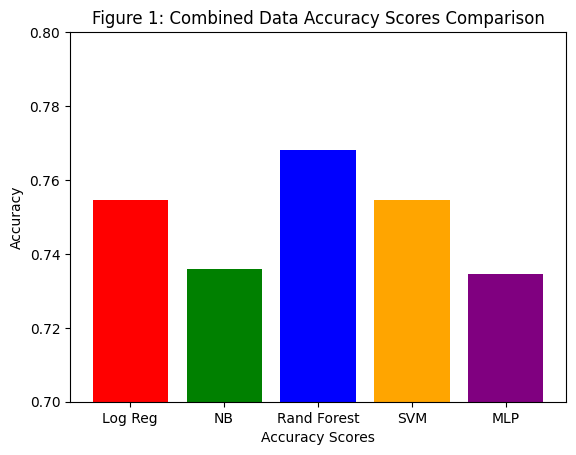

In [ ]:
#COMBINED DATA GRAPH




import matplotlib.pyplot as plt

# Bar chart data
accuracy_scores = [comb_logreg_accuracy, comb_nb_accuracy, comb_rnd_accuracy, comb_svm_accuracy, comb_mlp_accuracy]
x_labels = ['Log Reg', 'NB', 'Rand Forest', 'SVM', 'MLP']
colours= ['red', 'green', 'blue', 'orange', 'purple']

# Create the bar chart
plt.bar(x_labels, accuracy_scores, color=colours)

# Set y-axis limits
plt.ylim(0.7, 0.8)

# Add labels and title
plt.xlabel('Accuracy Scores')
plt.ylabel('Accuracy')
plt.title('Figure 1: Combined Data Accuracy Scores Comparison')

# Display the chart
plt.show()

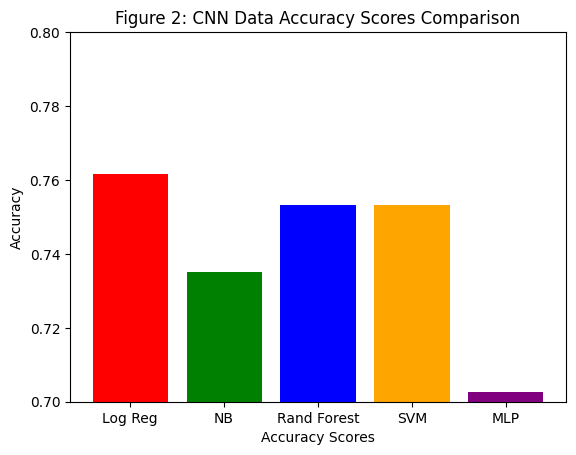

In [ ]:
#CNN DATA GRAPH




# Bar chart data
accuracy_scores = [cnn_logreg_accuracy, cnn_nb_accuracy, cnn_rnd_accuracy, cnn_svm_accuracy, cnn_mlp_accuracy]
x_labels = ['Log Reg', 'NB', 'Rand Forest', 'SVM', 'MLP']
colours= ['red', 'green', 'blue', 'orange', 'purple']

# Create the bar chart
plt.bar(x_labels, accuracy_scores, color=colours)

# Set y-axis limits
plt.ylim(0.7, 0.8)

# Add labels and title
plt.xlabel('Accuracy Scores')
plt.ylabel('Accuracy')
plt.title('Figure 2: CNN Data Accuracy Scores Comparison')

# Display the chart
plt.show()

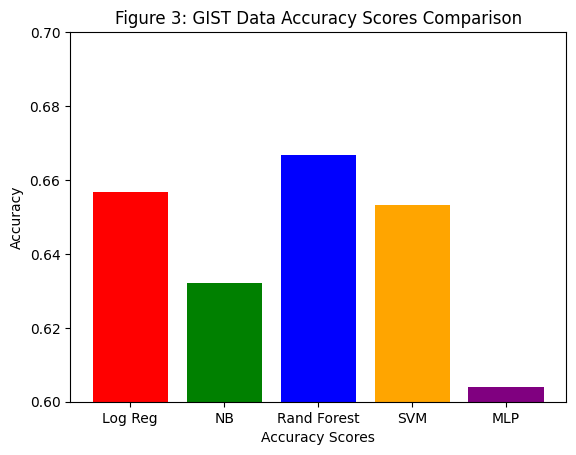

In [ ]:
# Bar chart data
accuracy_scores = [gist_logreg_accuracy, gist_nb_accuracy, gist_rnd_accuracy, gist_svm_accuracy, gist_mlp_accuracy]
x_labels = ['Log Reg', 'NB', 'Rand Forest', 'SVM', 'MLP']
colours= ['red', 'green', 'blue', 'orange', 'purple']

# Create the bar chart
plt.bar(x_labels, accuracy_scores, color=colours)

# Set y-axis limits
plt.ylim(0.6, 0.7)

# Add labels and title
plt.xlabel('Accuracy Scores')
plt.ylabel('Accuracy')
plt.title('Figure 3: GIST Data Accuracy Scores Comparison')

# Display the chart
plt.show()